[[ 3.90548504]
 [ 0.46094335]
 [-0.58933895]] 0.19424112210225397 500


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'linewidth'


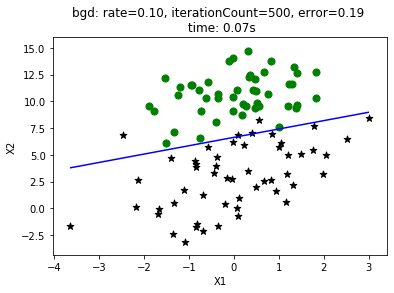

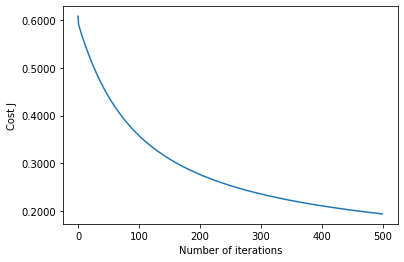

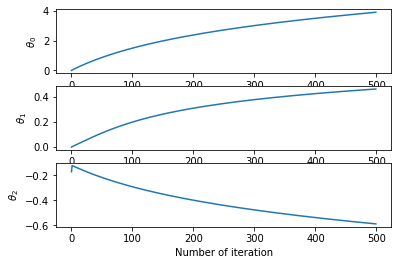

[[ 7.03803009]
 [ 0.71084578]
 [-1.0395157 ]] 0.12873197943835923 200


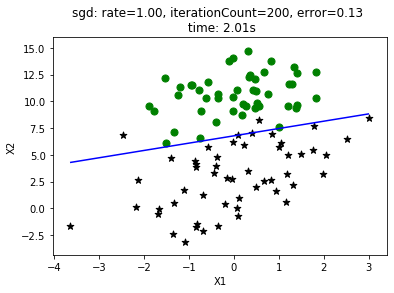

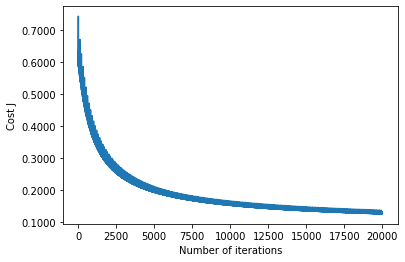

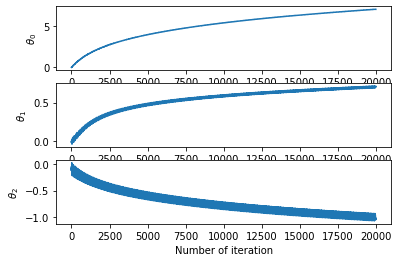

In [3]:
import numpy as np
import logical_regression as regression
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

X, y = regression.loadDataSet('./data/linear.txt')
m, n = X.shape
options = [{
        'rate': 0.1,
        'epsilon': 0.01,
        'maxLoop': 500,
        'method': 'bgd'
    },{
        'rate': 1,
        'epsilon': 0.01,
        'maxLoop': 200,
        'method': 'sgd'
    }]
for option in options:
    result, timeConsumed = regression.gradient(X, y, option)
    thetas, errors, iterationCount = result
    theta = thetas[-1]
    print(theta, errors[-1], iterationCount)
    # 绘制数据点
    fittingFig = plt.figure()
    title = '%s: rate=%.2f, iterationCount=%d, error=%.2f \n time: %.2fs' % (
            option['method'], option['rate'], iterationCount, errors[-1], timeConsumed)
    ax = fittingFig.add_subplot(111, title=title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    for i in range(m):
        x = X[i].A[0]
        if y[i] == 1:
            ax.scatter(x[1], x[2], marker='*', color='black', s=50)
        else:
            ax.scatter(x[1], x[2], marker='o', color='green', s=50)
    # 绘制决策边界
    x1Min = X[:, 1].min()
    x1Max = X[:, 1].max()
    x2Min = X[:, 2].min()
    x2Max = X[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1Min, x1Max),
        np.linspace(x2Min, x2Max))
    h = regression.sigmod(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], colors='b', linewidth=.5)
    plt.show()

    # 绘制误差曲线
    errorsFig = plt.figure()
    ax = errorsFig.add_subplot(111)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))

    ax.plot(range(len(errors)), errors)
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Cost J')
    plt.show()

    # 绘制theta的变化情况
    thetasFig, ax = plt.subplots(len(thetas[0]))
    thetas = np.asarray(thetas)
    for idx, sp in enumerate(ax):
        thetaList = thetas[:, idx]
        sp.plot(range(len(thetaList)), thetaList)
        sp.set_xlabel('Number of iteration')
        sp.set_ylabel(r'$\theta_%d$'%idx)
    plt.show()